Chapter 25

# 稳态向量
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

在这段代码中，我们主要处理的是一个马尔可夫链的状态转移过程，利用转移矩阵来计算每个时间步的状态概率分布。首先定义了一个转移矩阵$T$，它的元素表示在当前状态下转移到其他状态的概率。在本例中，$T$矩阵如下：

$$
T = \begin{pmatrix}
0.7 & 0.2 \\
0.3 & 0.8 
\end{pmatrix}
$$

这里，第一行表示从状态1转移到状态1和状态2的概率，第二行表示从状态2转移到状态1和状态2的概率。

然后定义了初始状态向量$\pi_i$，表示在时间点$i$处于各个状态的初始概率分布。在这个示例中，初始状态向量为：

$$
\pi_i = \begin{pmatrix}
0.6 \\
0.4 
\end{pmatrix}
$$

接下来，代码生成一个包含多个初始状态概率分布的矩阵$pi\_array$，其中每列代表不同的初始状态概率分布。使用`np.vstack()`和`np.linspace()`函数来生成从全1到全0的状态概率变化。

然后，代码使用循环依次计算每个时间步的状态概率向量，计算公式为：

$$
\pi(i+1) = T \cdot \pi(i)
$$

每次迭代，更新状态概率向量$pi$，并通过绘制热图可视化每个时间步的状态分布。图中的每个热图展示了在对应时间步的状态概率分布，$pi(i)$表示第$i$个时间步的状态概率。

最终，整个代码展示了如何通过转移矩阵进行状态转移，并可视化这些转移过程，从而更好地理解马尔可夫链的动态特性。

## 导入必要的库

In [1]:
import numpy as np  # 导入NumPy库，用于矩阵和数组计算
import seaborn as sns  # 导入Seaborn库，用于绘制热图
import matplotlib.pyplot as plt  # 导入Matplotlib库，用于绘图

## 定义转移矩阵和初始状态向量

In [2]:
T = np.matrix([[0.7, 0.2],  # 定义转移矩阵T，第一行表示从状态1到状态1和状态2的转移概率
               [0.3, 0.8]])  # 第二行表示从状态2到状态1和状态2的转移概率

In [3]:
pi_i = np.matrix([[0.6],  # 定义初始状态向量pi_i，表示在时间点i处于状态1的概率为0.6
                  [0.4]])  # 表示在时间点i处于状态2的概率为0.4

In [4]:
all_max = 1  # 定义热图的最大值，用于颜色映射
all_min = 0  # 定义热图的最小值，用于颜色映射

In [5]:
pi_array = np.vstack((np.linspace(1, 0, 11), 
                      1 - np.linspace(1, 0, 11)))  
# 生成多个初始状态向量，第一行为状态1的概率，第二行为状态2的概率

In [6]:
pi_array = np.matrix(pi_array)  # 将生成的数组转换为矩阵格式

In [7]:
num_steps = 12  # 定义时间步数，用于表示状态转移的次数

## 计算状态转移并可视化

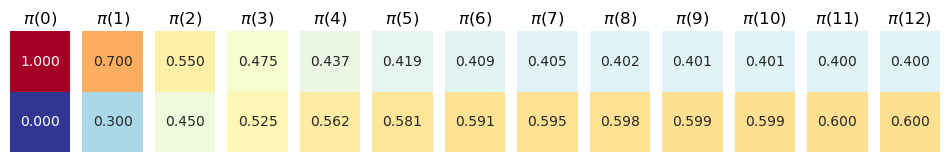

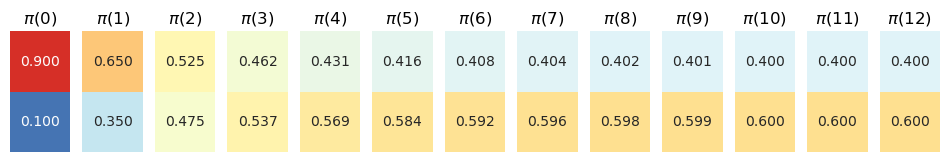

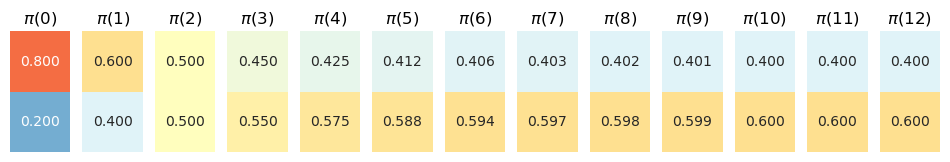

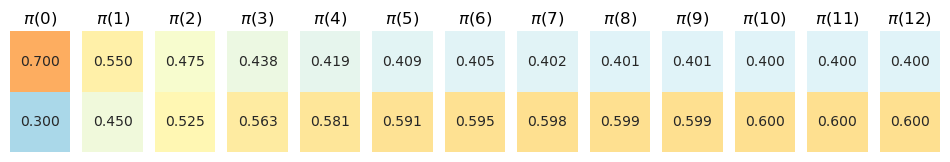

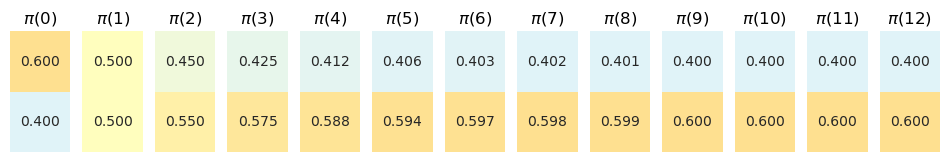

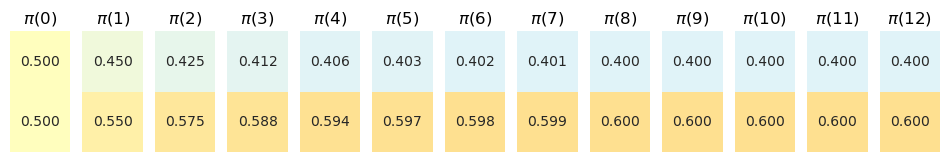

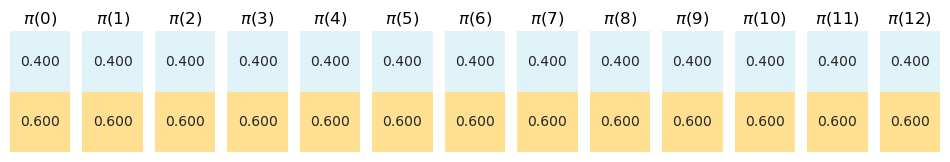

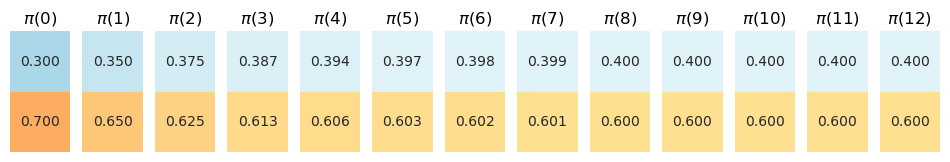

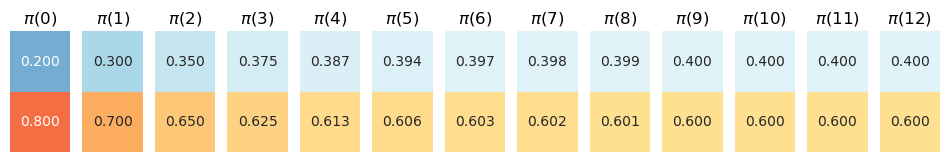

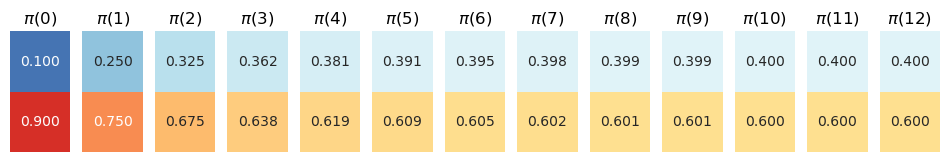

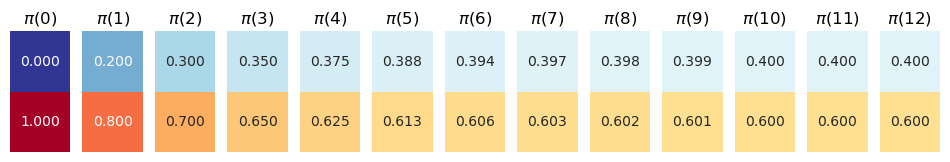

In [8]:
for ini in np.arange(0, np.shape(pi_array)[1]):  # 遍历所有的初始状态向量
    pi = pi_array[:, ini]  # 获取当前的初始状态向量
    fig, axes = plt.subplots(1, num_steps + 1, figsize=(12, 3))  # 创建包含多个子图的画布，每个时间步对应一个子图
    for i in np.arange(0, num_steps + 1):  # 遍历每一个时间步
        plt.sca(axes[i])  # 设置当前的绘图区域
        ax = sns.heatmap(pi, cmap='RdYlBu_r', vmax=all_max, vmin=all_min,  # 绘制当前状态向量的热图
                         annot=True, fmt=".3f", cbar=False,  # 在热图上显示数值，格式为小数点后三位
                         xticklabels=False, yticklabels=False)  # 隐藏热图的x轴和y轴标签
        ax.set_aspect("equal")  # 设置热图的坐标轴比例相等
        plt.title(r'$\pi(' + str(i) + ')$')  # 设置子图标题，表示当前状态的时间步
        ax.tick_params(left=False, bottom=False)  # 隐藏坐标轴的刻度
        pi = T @ pi  # 更新状态向量，通过矩阵乘法计算下一个时间步的状态向量